In [195]:
import pandas as pd
import matplotlib.pyplot as plt

In [196]:
ratings = pd.read_csv(r'Data/BX-Book-Ratings.csv', encoding = 'latin-1')

books = pd.read_csv(r'Data/BX-Books.csv', error_bad_lines = False, encoding = 'latin-1')

users = pd.read_csv(r'Data/BX-Users.csv', sep=';',encoding='latin-1')

books.drop(['Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21'], axis =1, inplace=True)

ratings.columns

books.columns

C:\Users\prane\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (3,8,9,10,11,12,13,14,15,16,17,18,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [197]:
users.drop(['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'], inplace=True, axis=1)

KeyError: "['Unnamed: 3' 'Unnamed: 4' 'Unnamed: 5' 'Unnamed: 6' 'Unnamed: 7'\n 'Unnamed: 8'] not found in axis"

In [198]:
users.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

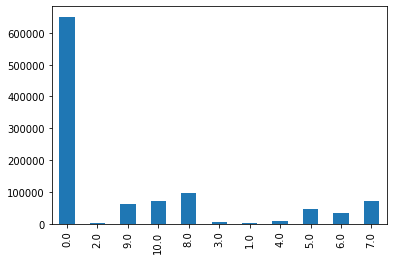

In [199]:
ratings['Book-Rating'].value_counts(sort=False).plot(kind='bar')

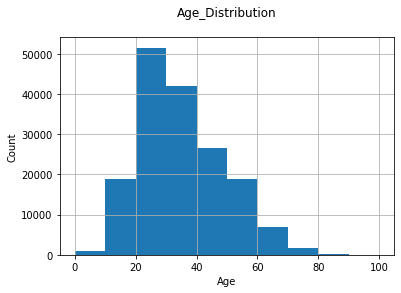

In [200]:
users['Age'].hist(bins=[0,10,20,30,40,50,60,70,80,90,100])
plt.title('Age_Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [201]:
counts1 = ratings['User-ID'].value_counts()
len(counts1[counts1 >= 200])

820

In [202]:
users_with_ratings_above_200 = ratings[ratings['User-ID'].isin(counts1[counts1 >= 200].index)]

In [203]:
users_with_ratings_above_200.head()

,User-ID,ISBN,Book-Rating
1456,277427,002542730X,10.0
1457,277427,26217457,0.0
1458,277427,003008685X,8.0
1459,277427,30615321,0.0
1460,277427,60002050,0.0


In [204]:
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
5,399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...
6,425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...
7,671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...
8,679425608,Under the Black Flag: The Romance and the Real...,David Cordingly,1996,Random House,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...


In [205]:
book_ratings = pd.merge(users_with_ratings_above_200, books, on='ISBN')

In [206]:
columns = ['Book-Author',
       'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M',
       'Image-URL-L']
book_ratings.drop(columns, axis=1, inplace=True)


In [207]:
book_ratings

,User-ID,ISBN,Book-Rating,Book-Title
0,277427,002542730X,10.0,Politically Correct Bedtime Stories: Modern Ta...
1,3363,002542730X,0.0,Politically Correct Bedtime Stories: Modern Ta...
2,11676,002542730X,6.0,Politically Correct Bedtime Stories: Modern Ta...
3,12538,002542730X,10.0,Politically Correct Bedtime Stories: Modern Ta...
4,13552,002542730X,0.0,Politically Correct Bedtime Stories: Modern Ta...
5,16795,002542730X,0.0,Politically Correct Bedtime Stories: Modern Ta...
6,24194,002542730X,0.0,Politically Correct Bedtime Stories: Modern Ta...
7,25981,002542730X,0.0,Politically Correct Bedtime Stories: Modern Ta...
8,26535,002542730X,0.0,Politically Correct Bedtime Stories: Modern Ta...
9,28204,002542730X,0.0,Politically Correct Bedtime Stories: Modern Ta...


In [208]:
book_ratings['Book-Title'].value_counts()

book_ratings.dropna(axis=0, subset=['Book-Title'], inplace=True)

book_ratings_count = book_ratings.groupby(['Book-Title'])['Book-Rating'].count().reset_index()

book_ratings_count.head()

ratings_with_totalRatingsCount = book_ratings.merge(book_ratings_count, left_on='Book-Title', 
                   right_on='Book-Title', how='left')
ratings_with_totalRatingsCount.columns

popular_books = ratings_with_totalRatingsCount[ratings_with_totalRatingsCount['Book-Rating_y'] >= 50]
popular_books.head()

,User-ID,ISBN,Book-Rating_x,Book-Title,Book-Rating_y
0,277427,002542730X,10.0,Politically Correct Bedtime Stories: Modern Ta...,74
1,3363,002542730X,0.0,Politically Correct Bedtime Stories: Modern Ta...,74
2,11676,002542730X,6.0,Politically Correct Bedtime Stories: Modern Ta...,74
3,12538,002542730X,10.0,Politically Correct Bedtime Stories: Modern Ta...,74
4,13552,002542730X,0.0,Politically Correct Bedtime Stories: Modern Ta...,74


In [209]:
popular_books.head()

,User-ID,ISBN,Book-Rating_x,Book-Title,Book-Rating_y
0,277427,002542730X,10.0,Politically Correct Bedtime Stories: Modern Ta...,74
1,3363,002542730X,0.0,Politically Correct Bedtime Stories: Modern Ta...,74
2,11676,002542730X,6.0,Politically Correct Bedtime Stories: Modern Ta...,74
3,12538,002542730X,10.0,Politically Correct Bedtime Stories: Modern Ta...,74
4,13552,002542730X,0.0,Politically Correct Bedtime Stories: Modern Ta...,74


In [210]:
from scipy.sparse import csr_matrix

In [211]:
popular_books.drop_duplicates(['User-ID', 'Book-Title'], inplace=True)

C:\Users\prane\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [212]:
popular_books = popular_books.pivot(index='Book-Title', columns='User-ID', values='Book-Rating_x').fillna(0)

In [213]:
popular_books_matrix = csr_matrix(popular_books.values)

In [214]:
popular_books.head()

User-ID,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,249628,249862,249894,250184,250405,250764,277427,277478,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [215]:
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(popular_books_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [216]:
import numpy as np
random_movie_index = np.random.randint(popular_books.shape[0])

In [217]:
distances, indices = model_knn.kneighbors(popular_books.iloc[random_movie_index,:].values.reshape(1,-1),n_neighbors=10)

In [218]:
distances.flatten()

array([0.        , 0.73630443, 0.75223707, 0.76588125, 0.78386351,
       0.78554979, 0.78672354, 0.79210018, 0.79309372, 0.79829133])

In [219]:
indices

array([[ 28, 548, 280, 382, 459, 474,   5, 273, 386,  32]], dtype=int64)

In [229]:
for i in range(len(distances.flatten())):
    if i == 0:
        print('hello')
    else:
        print(i)
        print(popular_books.index[indices.flatten()[i]])

hello
1
The Red Tent (Bestselling Backlist)
2
Love in the Time of Cholera (Penguin Great Books of the 20th Century)
3
Schindler's List
4
The Catcher in the Rye
5
The Diary of Ellen Rimbauer: My Life at Rose Red
6
84 Charing Cross Road
7
Life of Pi
8
Seabiscuit: An American Legend
9
Airframe


In [228]:
print(range(distances.flatten))

TypeError: 'builtin_function_or_method' object cannot be interpreted as an integer